<a href="https://colab.research.google.com/github/ParvaShah/GlassDoor-Machine-Learning-Challange/blob/master/GlassDoorML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')
print('Drive Mounted')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive
Drive Mounted


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mlp
import copy

from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier


from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from numpy.random import rand
from imblearn.under_sampling import RandomUnderSampler 
from imblearn.under_sampling import TomekLinks # doctest: +NORMALIZE_WHITESPACE
from collections import Counter
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.ensemble import  VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from fancyimpute import IterativeImputer
from sklearn.linear_model import LinearRegression



Using TensorFlow backend.


In [0]:
neveredit = pd.read_csv("drive/My Drive/Apply_Rate_2019.csv")
df = copy.deepcopy(neveredit)
maindata = copy.deepcopy(neveredit)
realdata = neveredit
real2 = neveredit



test = df[df['search_date_pacific']=='2018-01-27']
train = df[df['search_date_pacific']!='2018-01-27']


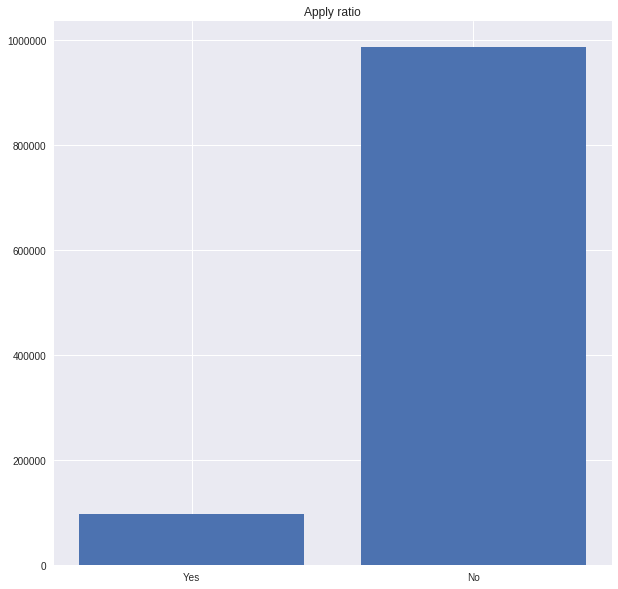

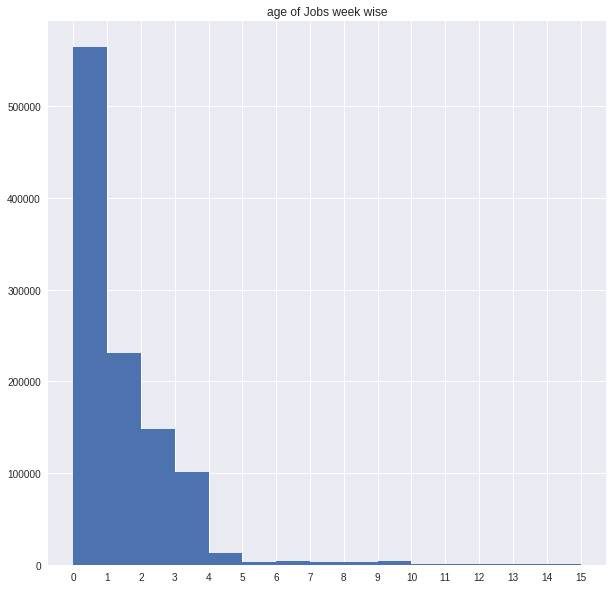

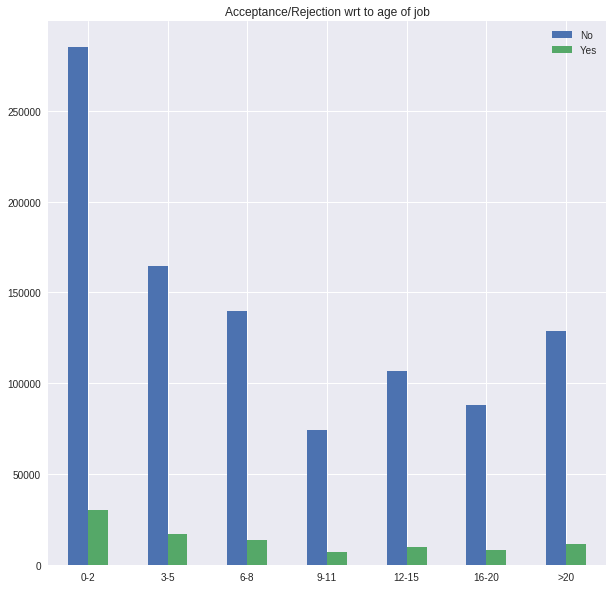

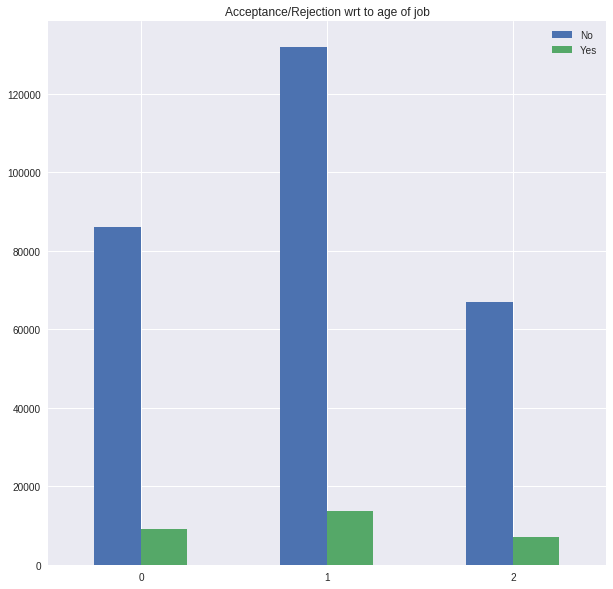

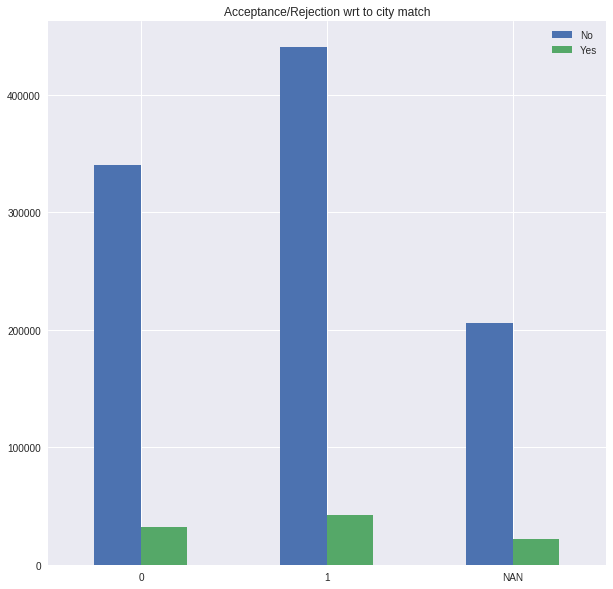

In [0]:
########################### Graphs #####################################


############ Apply Ratio -- Can see great disparity in job applications

apdf = train[train['apply'] == 1]
apply = len(apdf)
aparr = [apply,len(train)-apply]

plt.figure(figsize=(10,10))
y = [0,1] 
x = ['Yes','No']
plt.bar(y,aparr)
plt.xticks(y,x)
plt.title('Apply ratio')
plt.show()

############ job_age_days -- Can see not many jobs are older than 5 weeks  
 #                           and most jobs are one week old. Most jobs are 1 or 2 day old.

jobday = train['job_age_days']
unday = jobday.unique()
unday.sort()
plt.figure(figsize=(10,10))
lis = [i*7 for i in range(16)]
plt.hist(jobday, bins=lis)
plt.xticks(lis,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
plt.title('age of Jobs week wise')
plt.show()

########## Acceptance/Rejection wrt to age of job -- We can see highest rejection in first 3 days but it is due to high volume 
#                                                       of job has age between 0-3

job3 =  train.loc[train['job_age_days'].between(0,2) & (train['apply']==1)]
job3n =  train.loc[train['job_age_days'].between(0,2) & (train['apply']==0)]
job4 =  train.loc[train['job_age_days'].between(3,5) & (train['apply']==1)]
job4n =  train.loc[train['job_age_days'].between(3,5) & (train['apply']==0)]
job7 =  train.loc[train['job_age_days'].between(6,8) & (train['apply']==1)]
job7n =  train.loc[train['job_age_days'].between(6,8) & (train['apply']==0)]
job10 =  train.loc[train['job_age_days'].between(9,11) & (train['apply']==1)]
job10n =  train.loc[train['job_age_days'].between(9,11) & (train['apply']==0)]
job14 =  train.loc[train['job_age_days'].between(12,15) & (train['apply']==1)]
job14n =  train.loc[train['job_age_days'].between(12,15) & (train['apply']==0)]
job20 =  train.loc[train['job_age_days'].between(16,20) & (train['apply']==1)]
job20n =  train.loc[train['job_age_days'].between(16,20) & (train['apply']==0)]
job30 =  train.loc[train['job_age_days'].gt(20) & (train['apply']==1)]
job30n =  train.loc[train['job_age_days'].gt(20) & (train['apply']==0)]

accept = [len(job3),len(job4),len(job7),len(job10),len(job14),len(job20),len(job30)]
reject = [len(job3n),len(job4n),len(job7n),len(job10n),len(job14n),len(job20n),len(job30n)]
index = ['0-2','3-5','6-8','9-11','12-15','16-20','>20' ]
df = pd.DataFrame({'Yes': accept,'No': reject}, index=index)
ax = df.plot.bar(rot=0, figsize=(10,10), title='Acceptance/Rejection wrt to age of job')


#print(len(job14),len(job14n),len(job15),len(job15n))


job3 =  train.loc[train['job_age_days'].eq(0) & (train['apply']==1)]
job3n =  train.loc[train['job_age_days'].eq(0) & (train['apply']==0)]
job4 =  train.loc[train['job_age_days'].eq(1) & (train['apply']==1)]
job4n =  train.loc[train['job_age_days'].eq(1) & (train['apply']==0)]
job7 =  train.loc[train['job_age_days'].eq(2) & (train['apply']==1)]
job7n =  train.loc[train['job_age_days'].eq(2) & (train['apply']==0)]

accept = [len(job3),len(job4),len(job7)]
reject = [len(job3n),len(job4n),len(job7n)]
index = ['0','1','2' ]
df = pd.DataFrame({'Yes': accept,'No': reject}, index=index)
ax = df.plot.bar(rot=0, figsize=(10,10), title='Acceptance/Rejection wrt to age of job')

#################### City match


train['city_match'] = train['city_match'].fillna(3) # replace nan's with 3
city = train['city_match']
unday = city.unique()
unday.sort()

#### -- can see higher city matches


city0 =  train.loc[train['city_match'].eq(0) & (train['apply']==1)]
city0n =  train.loc[train['city_match'].eq(0) & (train['apply']==0)]
city1 =  train.loc[train['city_match'].eq(1) & (train['apply']==1)]
city1n =  train.loc[train['city_match'].eq(1) & (train['apply']==0)]
cityna =  train.loc[train['city_match'].eq(3) & (train['apply']==1)]
citynan =  train.loc[train['city_match'].eq(3) & (train['apply']==0)]

accept = [len(city0),len(city1),len(cityna)]
reject = [len(city0n),len(city1n),len(citynan)]
index = ['0','1','NAN' ]
df = pd.DataFrame({'Yes': accept,'No': reject}, index=index)
ax = df.plot.bar(rot=0, figsize=(10,10), title='Acceptance/Rejection wrt to city match')


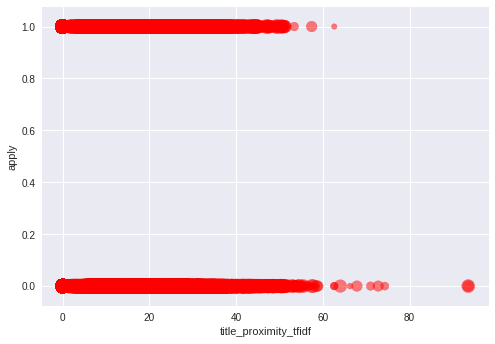

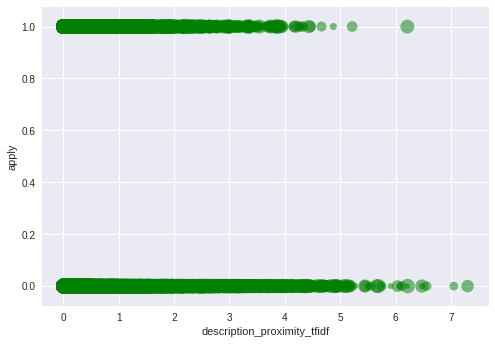

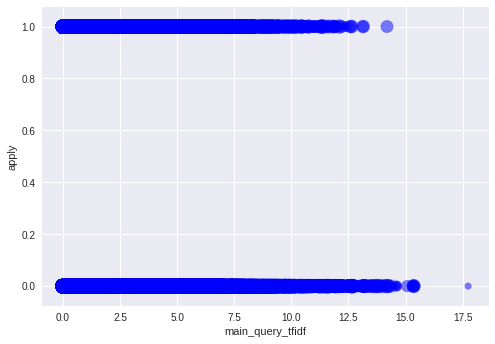

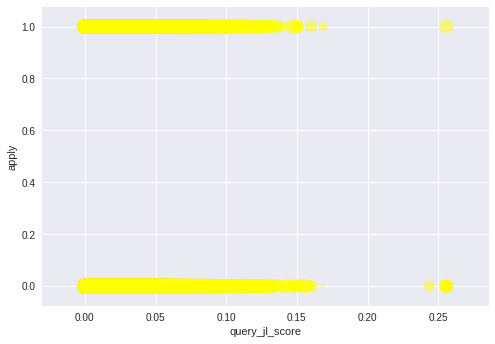

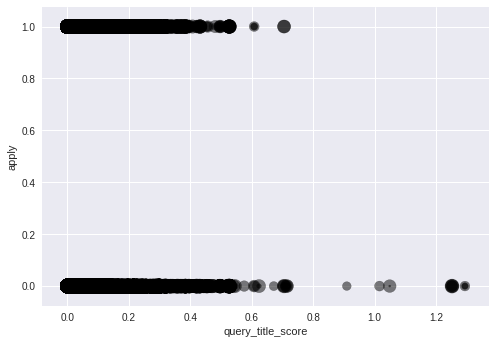

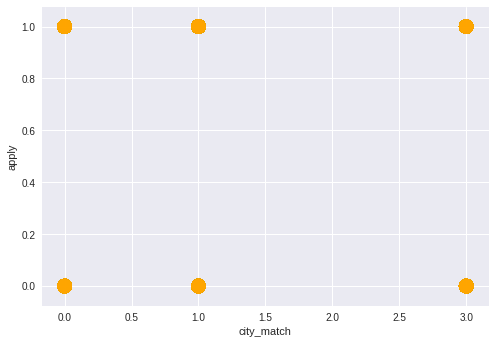

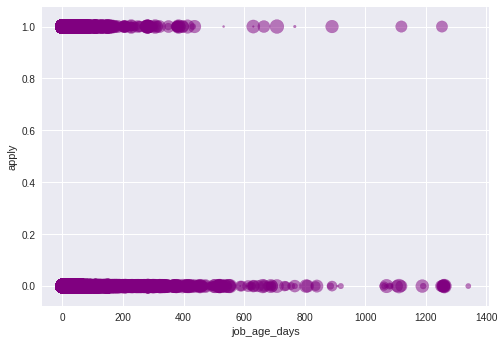

In [0]:
########################### Scatterplot ############################

i=0
labels = list(train)
for color in ['red', 'green', 'blue','yellow','black','orange','purple']:
    scale = 200.0 * rand(750)
    plt.scatter(train.iloc[:,i],train.iloc[:,7], alpha=0.5, label=labels[i], c=color, s=scale)
    
    plt.xlabel(labels[i])
    plt.ylabel(labels[7])
    plt.show()
    i += 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200890 entries, 0 to 1200889
Data columns (total 10 columns):
title_proximity_tfidf          1200890 non-null float64
description_proximity_tfidf    948319 non-null float64
main_query_tfidf               1200890 non-null float64
query_jl_score                 1200890 non-null float64
query_title_score              1200890 non-null float64
city_match                     944335 non-null float64
job_age_days                   1200890 non-null float64
apply                          1200890 non-null int64
search_date_pacific            1200890 non-null object
class_id                       1200890 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 91.6+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200890 entries, 0 to 1200889
Data columns (total 10 columns):
title_proximity_tfidf          1200890 non-null float64
description_proximity_tfidf    1200890 non-null float64
main_query_tfidf               1200890 non-null float64
query_jl_score                 1200890 non-null float64
query_title_score              1200890 non-null float64
city_match                     944335 non-null float64
job_age_days                   1200890 non-null float64
apply                          1200890 non-null int64
search_date_pacific            1200890 non-null object
class_id                       1200890 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 91.6+ MB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:81: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200890 entries, 0 to 1200889
Data columns (total 10 columns):
title_proximity_tfidf          1200890 non-null float64
description_proximity_tfidf    1200890 non-null float64
main_query_tfidf               1200890 non-null float64
query_jl_score                 1200890 non-null float64
query_title_score              1200890 non-null float64
city_match                     1200890 non-null float64
job_age_days                   1200890 non-null float64
apply                          1200890 non-null int64
search_date_pacific            1200890 non-null object
class_id                       1200890 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 91.6+ MB
5.889799785254209 0.09611920120599776 0.5636760259865408
[0. 1.]


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.9100317264111634


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.9100417190103945


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


0.9100367227118191


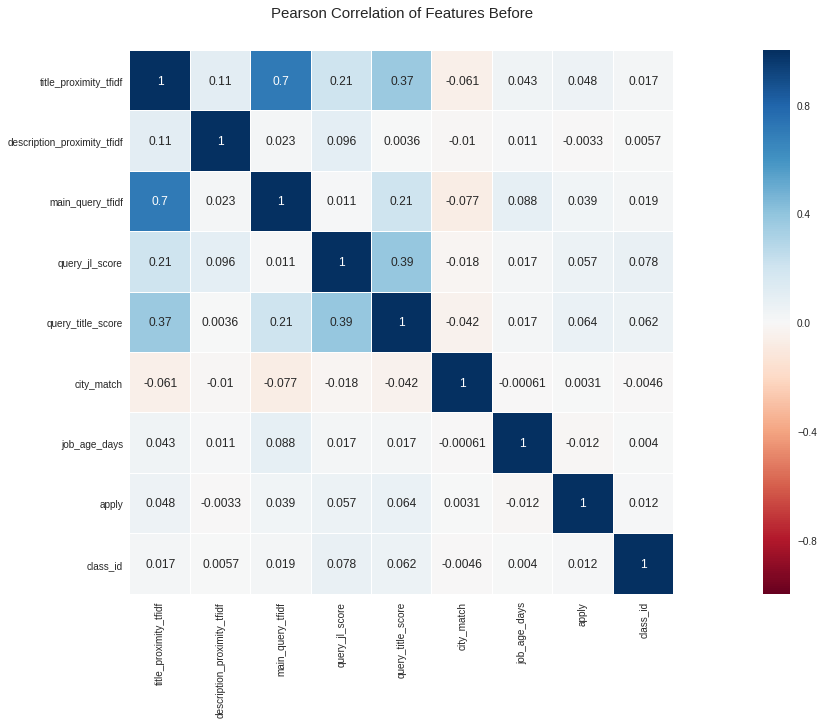

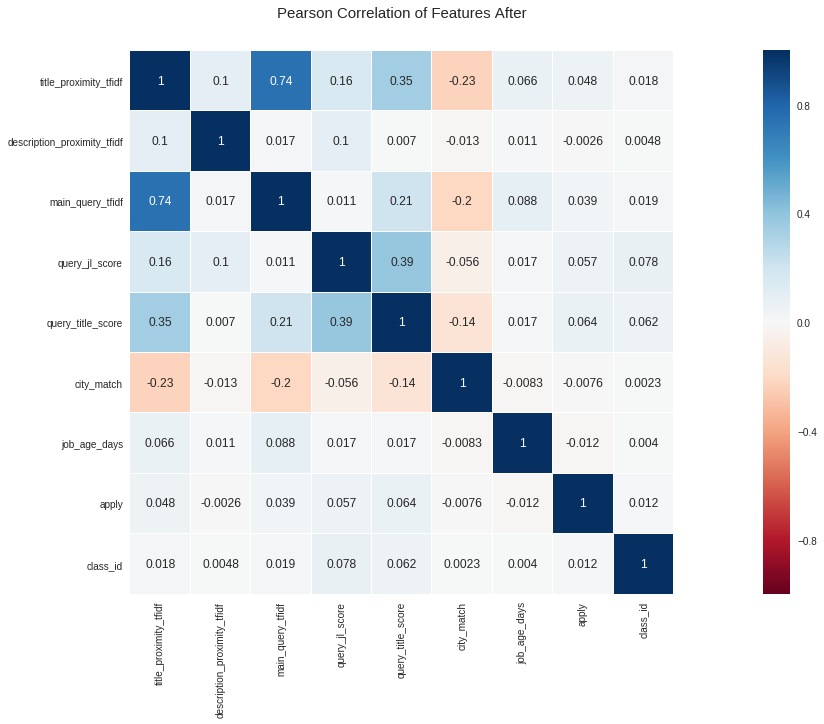

In [0]:
################## Pearson's feature 




colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features Before', y=1.05, size=15)

sns.heatmap(maindata.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)










#################### Replace nan's  ##################################################

### Replace nan using MICE


XY_incomplete = maindata.drop(['search_date_pacific'],axis=1) # insert your data here

n_imputations = 20
XY_completed = []
for i in range(n_imputations):
    imputer = IterativeImputer(n_iter=10, sample_posterior=True, random_state=i)
    XY_completed.append(imputer.fit_transform(XY_incomplete))

XY_completed_mean = np.mean(XY_completed, 0)
XY_completed_std = np.std(XY_completed, 0)



### Replace nan using linear regression




linreg = LinearRegression()
data = maindata[['main_query_tfidf','query_jl_score','query_title_score','title_proximity_tfidf']]
#Step-1: Split the dataset that contains the missing values and no missing values are test and train respectively.
x_train = data[data['title_proximity_tfidf'].notnull()].drop(columns='title_proximity_tfidf')
y_train = data[data['title_proximity_tfidf'].notnull()]['title_proximity_tfidf']
x_test = data[data['title_proximity_tfidf'].isnull()].drop(columns='title_proximity_tfidf')
y_test = data[data['title_proximity_tfidf'].isnull()]['title_proximity_tfidf']
#Step-2: Train the machine learning algorithm
linreg.fit(x_train, y_train)
#Step-3: Predict the missing values in the attribute of the test data.
predicted = linreg.predict(x_test)
#Step-4: Let’s obtain the complete dataset by combining with the target attribute.
maindata.title_proximity_tfidf[maindata.title_proximity_tfidf.isnull()] = predicted
maindata.info()



linreg = LinearRegression()
data = maindata[['main_query_tfidf','query_jl_score','description_proximity_tfidf','title_proximity_tfidf']]
x_train = data[data['description_proximity_tfidf'].notnull()].drop(columns='description_proximity_tfidf')
y_train = data[data['description_proximity_tfidf'].notnull()]['description_proximity_tfidf']
x_test = data[data['description_proximity_tfidf'].isnull()].drop(columns='description_proximity_tfidf')
y_test = data[data['description_proximity_tfidf'].isnull()]['description_proximity_tfidf']
linreg.fit(x_train, y_train)
predicted = linreg.predict(x_test)
maindata.description_proximity_tfidf[maindata.description_proximity_tfidf.isnull()] = predicted
maindata.info()


linreg = LinearRegression()
data = maindata[['main_query_tfidf','title_proximity_tfidf','query_title_score','city_match']]
x_train = data[data['city_match'].notnull()].drop(columns='city_match')
y_train = data[data['city_match'].notnull()]['city_match']
x_test = data[data['city_match'].isnull()].drop(columns='city_match')
y_test = data[data['city_match'].isnull()]['city_match']
linreg.fit(x_train, y_train)
predicted = linreg.predict(x_test)
maindata.city_match[maindata.city_match.isnull()] = predicted
maindata.info()

maindata.loc[maindata['city_match'] >= .50, 'city_match'] = 1
maindata.loc[maindata['city_match'] < .50, 'city_match'] = 0
        
        


### Replace nan using mean method


mean1 = realdata['title_proximity_tfidf'].mean(skipna='true')
mean2 = realdata['description_proximity_tfidf'].mean(skipna='true')
mean3 = realdata['city_match'].mean()
print(mean1,mean2,mean3)

real2['title_proximity_tfidf'].fillna(mean1, inplace = True)
real2['description_proximity_tfidf'].fillna(mean2, inplace = True)
real2['city_match'].fillna(mean3, inplace = True)
real2.loc[real2['city_match'] >= .50, 'city_match'] = 1
real2.loc[real2['city_match'] < .50, 'city_match'] = 0



print(real2['city_match'].unique())


################ Check methods which replaces nan's ##################################################



################ Check MICE method which replaces nan's

values = XY_completed_mean
X = values[:,0:7]
y = values[:,7]
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, XY_completed_mean, y, cv=kfold, scoring='accuracy')
print(result.mean())


#0.9100258974037861

################ Check linear regresion method which replaces nan's

values = maindata.iloc[:,:8]
X = values.iloc[:,0:7]
y = values.iloc[:,7]
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, maindata.iloc[:,:8], y, cv=kfold, scoring='accuracy')
print(result.mean())

#0.9100417190103945


################ Check mean replacement method which replaces nan's

values = real2.iloc[:,:8]
X = values.iloc[:,0:7]
y = values.iloc[:,7]
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3, random_state=7)
result = cross_val_score(model, real2.iloc[:,:8], y, cv=kfold, scoring='accuracy')
print(result.mean())

#0.9100375554289418



################## Pearson's feature 

colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Pearson Correlation of Features After', y=1.05, size=15)

sns.heatmap(maindata.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)





In [0]:
################# Further feature engineering ###########################################

########## one-hot encode city_match


maindata = pd.concat([maindata, pd.get_dummies(maindata['city_match'], prefix=['City_match_No', 'City_match_Yes']) ], axis=1)

maindata = maindata.drop(columns=['city_match'],axis=1)

maindata = maindata.rename(index=str, columns={"['City_match_No', 'City_match_Yes']_0.0": "city_match_No", "['City_match_No', 'City_match_Yes']_1.0": "city_match_Yes"})

##### Rearranging columns

maindata = maindata[['title_proximity_tfidf','description_proximity_tfidf',\
                             'main_query_tfidf','query_jl_score','query_title_score',\
                             'city_match_No','city_match_Yes','job_age_days','apply','search_date_pacific','class_id']]


maindata.head()

,title_proximity_tfidf,description_proximity_tfidf,main_query_tfidf,query_jl_score,query_title_score,city_match_No,city_match_Yes,job_age_days,apply,search_date_pacific,class_id
0,0.000000,0.000000,0.000000,0.004824,0.006628,1,0,5.0,0,2018-01-21,-7613806991329176388
1,11.874042,0.043637,2.527080,0.011935,0.011208,1,0,5.0,0,2018-01-21,-1361819269400927213
2,11.874042,0.043637,2.527080,0.011935,0.011208,1,0,5.0,1,2018-01-21,-1361819269400927213
3,0.000000,0.000000,3.695809,0.013046,0.033340,1,0,5.0,0,2018-01-23,-3623880078591607667
4,21.616160,0.082059,7.868900,0.008065,0.008772,1,0,7.0,0,2018-01-24,-7054510112423797411


In [0]:
################# Split Data ###########################################

########## Use under sampling for training data

train = maindata[maindata['search_date_pacific']!='2018-01-27']



X = train.drop(['apply'],axis=1)
y = train['apply']
rus = RandomUnderSampler(random_state=42,sampling_strategy=1)
X_res, y_res = rus.fit_resample(X, y)


# Embed values in train dataframe

train = pd.DataFrame({'Column1':X_res[:,0],
                        'Column2':X_res[:,1],
                        'Column3':X_res[:,2],'Column4':X_res[:,3],
                        'Column5':X_res[:,4],'Column6':X_res[:,5],'Column7':X_res[:,6],
                        'Column8':X_res[:,7],
                        'Column9':y_res[:],
                        'Column10':X_res[:,8],
                        'Column11':X_res[:,9]})


train = train[['Column1','Column2','Column3','Column4','Column5','Column6','Column7','Column8','Column9','Column10','Column11']]

train = train.rename(columns={'Column1':'title_proximity_tfidf','Column2':'description_proximity_tfidf',
                             'Column3':'main_query_tfidf','Column4':'query_jl_score','Column5':'query_title_score',
                             'Column6':'city_match_No','Column7':'city_match_Yes','Column8':'job_age_days','Column9':'apply','Column10':'search_date_pacific','Column11':'class_id'})


print(train.head())

# Test data remains unchanged

test = maindata[maindata['search_date_pacific']=='2018-01-27']



# converting objects to numeric

train_X = train.iloc[:,:8]
train_X = train_X.apply(pd.to_numeric)

train_y = train.iloc[:,8]
train_y = train_y.apply(pd.to_numeric)

test_X =  test.iloc[:,:8]
test_X = test_X.apply(pd.to_numeric)

test_y =  test.iloc[:,8]
test_y = test_y.apply(pd.to_numeric)

print('training without class_id : ',train_X.head())



####### create data when class_id column is added to dataset


let1 = train.iloc[:,:8]
let2 = test.iloc[:,:8]

let1 = pd.concat([let1,train['class_id']],axis=1)
let2 = pd.concat([let2,test['class_id']],axis=1)



train_X1 = let1.iloc[:,:9]
train_X1 = train_X1.apply(pd.to_numeric)

train_y1 = train_y

test_X1 =  let2.iloc[:,:9]
test_X1 = test_X1.apply(pd.to_numeric)

test_y1 =  test_y
print('training with class_id : ',train_X1.head())


  title_proximity_tfidf description_proximity_tfidf main_query_tfidf  \
0               13.4622                    0.103982          4.08132   
1             -0.300347                   0.0937525        0.0501496   
2              0.570032                   0.0963793                0   
3                     0                           0          5.60151   
4               27.9937                           0          4.94877   

  query_jl_score query_title_score city_match_No city_match_Yes job_age_days  \
0      0.0214627         0.0212268             1              0            2   
1      0.0182049         0.0207437             0              1            6   
2      0.0168494         0.0565426             0              1            0   
3      0.0202891         0.0158749             1              0            0   
4      0.0178016             1e-06             1              0            0   

   apply search_date_pacific              class_id  
0      0          2018-01-25   17

In [0]:
############## Undersamping with tomekLinks ----- Didn't helped much so we will stick to undersampler


train = maindata[maindata['search_date_pacific']!='2018-01-27']


print('1')
X = train.drop(['apply'],axis=1)
y = train['apply']
print('')
X = X.iloc[:,:8]
print('Original dataset shape %s' % Counter(y))

tl = TomekLinks()
X_res, y_res = tl.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


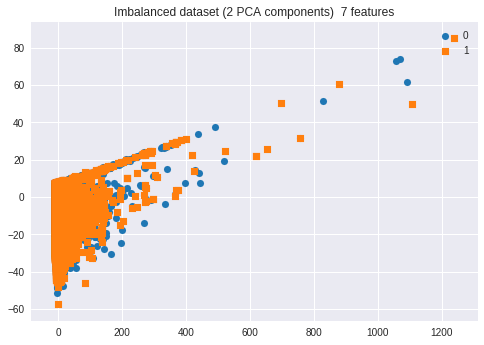

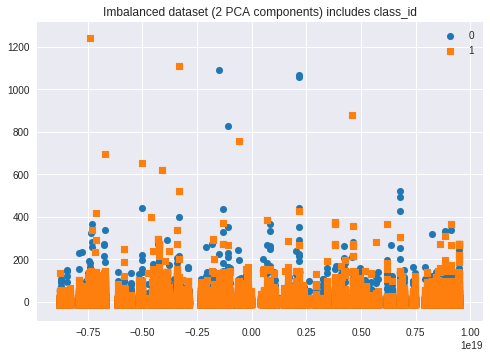

In [0]:
############### PCA ####################

def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    linewidth = [0.1,0.1]
    for l, c, m,w in zip(np.unique(y), colors, markers,linewidth):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m, linewidths = w
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()
 


Xd = train_X.iloc[:,:]

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(Xd)

plot_2d_space(X, train_y, 'Imbalanced dataset (2 PCA components)  7 features')



Xd = train_X1.iloc[:,:] 

pca = PCA(n_components=2)
X = pca.fit_transform(Xd)

plot_2d_space(X, train_y, 'Imbalanced dataset (2 PCA components) includes class_id')


In [0]:
############### All classifiers that are used




def algo(X,y,test_X,test_y):

    MLA = [
            discriminant_analysis.LinearDiscriminantAnalysis(),
            discriminant_analysis.QuadraticDiscriminantAnalysis(),
            linear_model.LogisticRegressionCV(),
            linear_model.PassiveAggressiveClassifier(),
            linear_model.RidgeClassifierCV(),
            linear_model.SGDClassifier(),
            linear_model.Perceptron(),
            ensemble.AdaBoostClassifier(),
            ensemble.BaggingClassifier(),
            ensemble.ExtraTreesClassifier(),
            ensemble.GradientBoostingClassifier(),
            ensemble.RandomForestClassifier(),
            linear_model.LogisticRegressionCV(),
            linear_model.PassiveAggressiveClassifier(),
            linear_model.RidgeClassifierCV(),
            linear_model.SGDClassifier(),
            linear_model.Perceptron(),
            naive_bayes.BernoulliNB(),
            naive_bayes.GaussianNB(),
            neighbors.KNeighborsClassifier(),
            svm.LinearSVC(),
            tree.DecisionTreeClassifier(),
            tree.ExtraTreeClassifier(),
            XGBClassifier()
        ]







    cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 ) 
    #create table to compare MLA metrics
    MLA_columns = ['MLA Name', 'AUC']
    MLA_compare = pd.DataFrame(columns = MLA_columns)



    #index through MLA and save performance to table
    row_index = 0
    for alg in MLA:

        #set name and parameters
        MLA_name = alg.__class__.__name__
        MLA_compare.loc[row_index, 'MLA Name'] = MLA_name


        cv_results = model_selection.cross_validate(alg, X, y, cv  = cv_split)



        alg.fit(X, y)
        prediction = alg.predict(test_X)
        d = roc_auc_score(test_y,prediction)

        MLA_compare.loc[row_index, 'AUC'] = d
        row_index+=1
        print('row_index',row_index)



    MLA_compare.sort_values(by = ['AUC'], ascending = False, inplace = True)
    MLA_compare


    sns.barplot(x='AUC', y = 'MLA Name', data = MLA_compare, color = 'm')

    #prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
    plt.title('All AUC Scores \n')
    plt.xlabel('AUC Score (%)')
    plt.ylabel('Algorithm')
    


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn

row_index 1


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

row_index 2


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mode

row_index 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left un

row_index 4
row_index 5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

row_index 6


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If to

row_index 7
row_index 8
row_index 9


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

row_index 10
row_index 11


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

row_index 12


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_mode

row_index 13


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left un

row_index 14
row_index 15


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

row_index 16


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If to

row_index 17
row_index 18
row_index 19
row_index 20


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


row_index 21
row_index 22
row_index 23
row_index 24


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


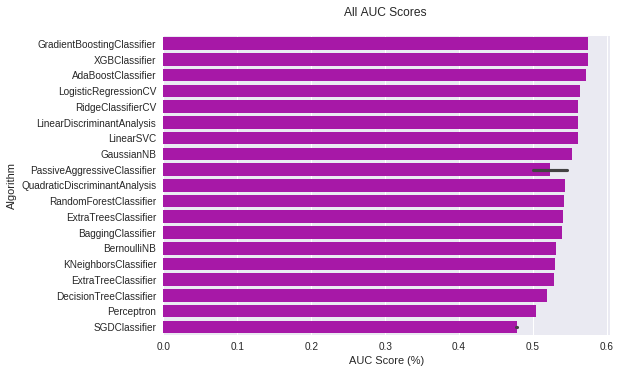

In [0]:
##### check all algorithmns 

algo(train_X,train_y,test_X,test_y)

############### See end of output for AUC scores

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=0.3)`


Epoch 1/5
194834/194834 [==============================] - 117s 598us/step - loss: 8.0589 - acc: 0.5000
Epoch 2/5
194834/194834 [==============================] - 116s 596us/step - loss: 8.0590 - acc: 0.5000
Epoch 3/5
194834/194834 [==============================] - 117s 599us/step - loss: 8.0590 - acc: 0.5000
Epoch 4/5
194834/194834 [==============================] - 116s 596us/step - loss: 8.0590 - acc: 0.5000
Epoch 5/5
194834/194834 [==============================] - 117s 602us/step - loss: 8.0590 - acc: 0.5000
0.5


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

       False       0.91      1.00      0.95    105940
        True       0.00      0.00      0.00     10586

   micro avg       0.91      0.91      0.91    116526
   macro avg       0.45      0.50      0.48    116526
weighted avg       0.83      0.91      0.87    116526



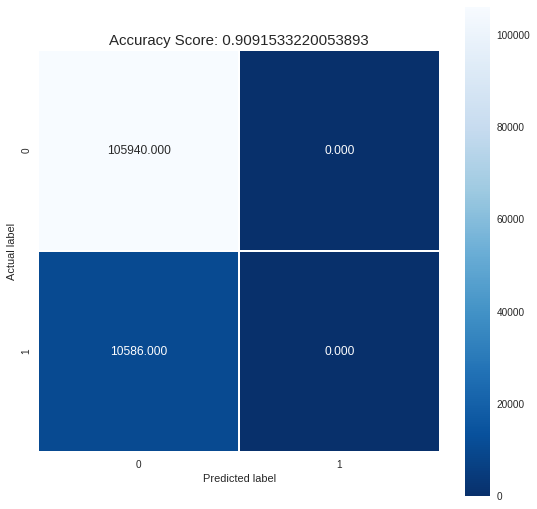

In [0]:
######### Neural Net ################


def display_confusion_matrix(sample_test, prediction, score=None):
    cm = metrics.confusion_matrix(sample_test, prediction)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    if score:
        all_sample_title = 'Accuracy Score: {0}'.format(score)
        plt.title(all_sample_title, size = 15)
    print(metrics.classification_report(sample_test, prediction))



def build_ann(optimizer='adam'):
    # Initializing our ANN
    ann = Sequential()
    # Adding the input layer and the first hidden layer of our ANN with dropout
    ann.add(Dense(units=32, kernel_initializer='glorot_normal', activation='relu', input_shape = (8,)))
    ann.add(Dropout(p=0.3)) # Dropout will disable some neurons (here 50% of all neurons) to avoid overfitting
    # Add another layer, it is not necessary to pass the shape because there is a layer before
    ann.add(Dense(units=64, kernel_initializer='glorot_normal', activation='relu'))
    ann.add(Dropout(p=0.3))
    ann.add(Dense(units=128, kernel_initializer='glorot_normal', activation='relu'))
    ann.add(Dropout(p=0.3))
    
    ann.add(Dense(units=256, kernel_initializer='glorot_normal', activation='relu'))
    # Adding the output layer
    ann.add(Dense(units=1, kernel_initializer='glorot_normal', activation='relu'))
    
    # Compilling the ANN
    ann.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    return ann

ann = build_ann()
# Training the ANN
c = ann.fit(train_X, train_y, batch_size=10, epochs=5)

ann_prediction = ann.predict(test_X)

mea = np.mean(ann_prediction)
ann_prediction = (ann_prediction > .5) # convert probabilities to binary output
test_y = (test_y > 0)
# Compute error between predicted data and true response and display it in confusion matrix
score = metrics.accuracy_score(test_y, ann_prediction)
d = roc_auc_score(test_y,ann_prediction)
print(d)
display_confusion_matrix(test_y, ann_prediction, score=score)

In [0]:
################ Voting for final prediction without class_id

gbc = ensemble.GradientBoostingClassifier(verbose=1,n_estimators=200,learning_rate=0.1, min_samples_split=2000,min_samples_leaf=50,max_depth=9,max_features='sqrt',subsample=0.8,random_state=10) 

abc = ensemble.AdaBoostClassifier(n_estimators=500,learning_rate=1)

xgb = XGBClassifier(learning_rate =0.1,n_estimators=500,max_depth=9,min_child_weight=6,gamma=0,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.005,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)

eclf = VotingClassifier(estimators=[('abc', abc), ('gbc', gbc),('xgb',xgb)], voting='hard')


c = eclf.fit(train_X, train_y)
y_val_pred = c.predict(test_X)
d = roc_auc_score(test_y,y_val_pred)
print('AUC-Score for dataset without class_id : ',d)


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3809           0.0046           51.57s
         2           1.3764           0.0037           51.28s
         3           1.3727           0.0035           52.02s
         4           1.3692           0.0028           51.78s
         5           1.3666           0.0023           51.05s
         6           1.3641           0.0019           51.12s
         7           1.3622           0.0016           50.68s
         8           1.3604           0.0014           50.11s
         9           1.3584           0.0011           49.61s
        10           1.3573           0.0008           49.17s
        20           1.3494           0.0003           45.11s
        30           1.3450           0.0000           40.48s
        40           1.3419           0.0001           35.99s
        50           1.3403          -0.0000           32.62s
        60           1.3382          -0.0001           29.77s
       

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn

row_index 1


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:716: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:716: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:719: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:716: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:716: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (

row_index 2


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

row_index 3


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left un

row_index 4
row_index 5


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

row_index 6


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If to

row_index 7
row_index 8
row_index 9


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

row_index 10
row_index 11


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

row_index 12


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

row_index 13


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If both are left un

row_index 14
row_index 15


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

row_index 16


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If to

row_index 17
row_index 18
row_index 19
row_index 20


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


row_index 21
row_index 22
row_index 23
row_index 24


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


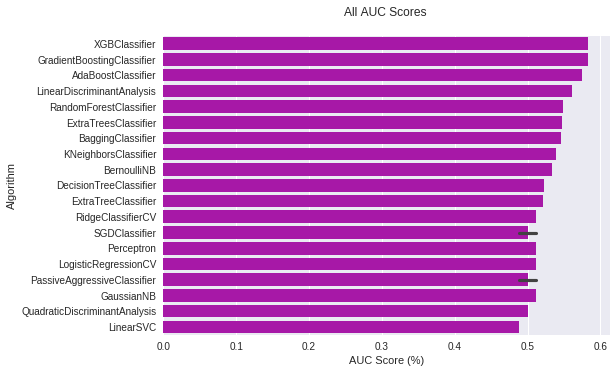

In [0]:
##### check all algorithmns after adding 'class_id' feature
algo(train_X1,train_y1,test_X1,test_y1)

############### See end of output for AUC scores

In [0]:
################ Voting for final prediction with class_id

gbc = ensemble.GradientBoostingClassifier(verbose=1,n_estimators=200,learning_rate=0.1, min_samples_split=2000,min_samples_leaf=50,max_depth=9,max_features='sqrt',subsample=0.8,random_state=10) 

abc = ensemble.AdaBoostClassifier(n_estimators=500,learning_rate=1)

xgb = XGBClassifier(learning_rate =0.1,n_estimators=500,max_depth=9,min_child_weight=6,gamma=0,subsample=0.8,colsample_bytree=0.8,reg_alpha=0.005,objective= 'binary:logistic',nthread=4,scale_pos_weight=1,seed=27)

eclf = VotingClassifier(estimators=[('abc', abc), ('gbc', gbc),('xgb',xgb)], voting='hard')


c = eclf.fit(train_X1, train_y1)
y_val_pred = c.predict(test_X1)
d = roc_auc_score(test_y1,y_val_pred)
print('AUC-Score for dataset with class_id : ',d)


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3805           0.0049            1.08m
         2           1.3757           0.0042            1.05m
         3           1.3718           0.0035            1.05m
         4           1.3680           0.0029            1.07m
         5           1.3652           0.0024            1.06m
         6           1.3624           0.0020            1.07m
         7           1.3604           0.0017            1.07m
         8           1.3582           0.0015            1.06m
         9           1.3560           0.0010            1.06m
        10           1.3547           0.0010            1.05m
        20           1.3453           0.0002           57.30s
        30           1.3391          -0.0001           51.57s
        40           1.3343           0.0001           46.48s
        50           1.3311           0.0000           41.83s
        60           1.3285           0.0001           37.94s
       

5860